# Bibliotecas e preparação dos arquivos

## Bibliotecas

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder

filterwarnings('ignore')
os.chdir(r"/Users/bentofh/Documents/GitHub/Store Sales")

## Importação do arquivo

Conforme conversado com o Anwar, como no nosso .csv de teste não existem dados de sales, por se tratar de uma competição do Kaggle, teremos que nós mesmos gerarmos nosso dataset de teste, que será uma parte dos dados disponíveis em train.csv 

In [333]:
df = pd.read_csv('train.csv')

In [334]:
df['date'] = pd.to_datetime(df['date'])

In [335]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [336]:
print("Data mínima:", df['date'].min())
print("Data máxima:", df['date'].max())

Data mínima: 2013-01-01 00:00:00
Data máxima: 2017-08-15 00:00:00


In [337]:
# Remover 2017-08 da análise pois não é um mês completo
mask_1708 = df['date'].dt.strftime('%Y-%m').str.startswith('2017-08')
df = df[~mask_1708]

In [338]:
print("Data mínima:", df['date'].min())
print("Data máxima:", df['date'].max())

Data mínima: 2013-01-01 00:00:00
Data máxima: 2017-07-31 00:00:00


## Distribuição de Sales por data

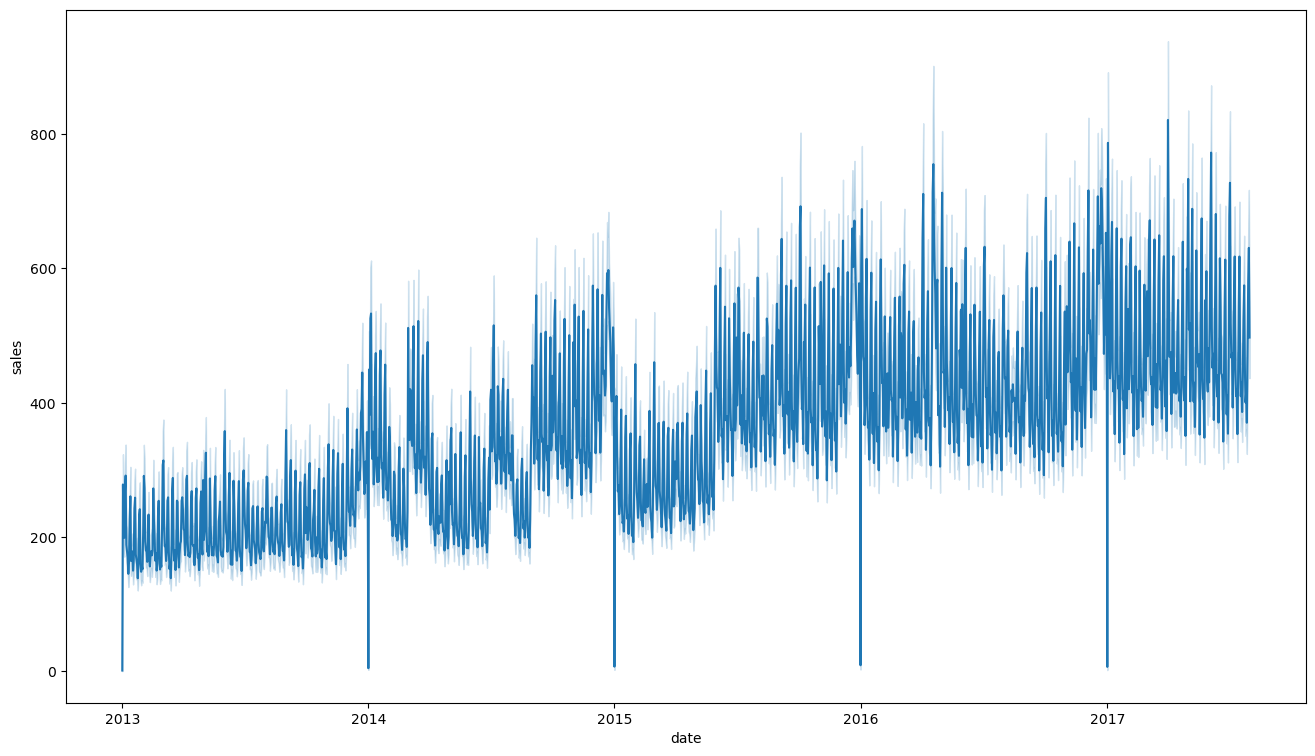

In [339]:
plt.figure(figsize = (16, 9))
sns.lineplot(x = df.date, y = df.sales)
plt.show()

## Convertendo colunas String em Int e salvando o resultado

In [340]:
mapeamento_valores_family = {}

for i, valor in enumerate(df['family'].unique()):
    mapeamento_valores_family[valor] = i

df['family_numerica'] = df['family'].map(mapeamento_valores_family)

print("Mapeamento de valores:")
for valor, numero in mapeamento_valores_family.items():
    print(f"{valor}: {numero}")

Mapeamento de valores:
AUTOMOTIVE: 0
BABY CARE: 1
BEAUTY: 2
BEVERAGES: 3
BOOKS: 4
BREAD/BAKERY: 5
CELEBRATION: 6
CLEANING: 7
DAIRY: 8
DELI: 9
EGGS: 10
FROZEN FOODS: 11
GROCERY I: 12
GROCERY II: 13
HARDWARE: 14
HOME AND KITCHEN I: 15
HOME AND KITCHEN II: 16
HOME APPLIANCES: 17
HOME CARE: 18
LADIESWEAR: 19
LAWN AND GARDEN: 20
LINGERIE: 21
LIQUOR,WINE,BEER: 22
MAGAZINES: 23
MEATS: 24
PERSONAL CARE: 25
PET SUPPLIES: 26
PLAYERS AND ELECTRONICS: 27
POULTRY: 28
PREPARED FOODS: 29
PRODUCE: 30
SCHOOL AND OFFICE SUPPLIES: 31
SEAFOOD: 32


In [341]:
mapeamento_valores_date = {}

for i, valor in enumerate(df['date'].unique()):
    mapeamento_valores_date[valor] = i

df['date_numerica'] = df['date'].map(mapeamento_valores_date)

print("Mapeamento de valores:")
for valor, numero in mapeamento_valores_date.items():
    print(f"{valor}: {numero}")

Mapeamento de valores:
2013-01-01 00:00:00: 0
2013-01-02 00:00:00: 1
2013-01-03 00:00:00: 2
2013-01-04 00:00:00: 3
2013-01-05 00:00:00: 4
2013-01-06 00:00:00: 5
2013-01-07 00:00:00: 6
2013-01-08 00:00:00: 7
2013-01-09 00:00:00: 8
2013-01-10 00:00:00: 9
2013-01-11 00:00:00: 10
2013-01-12 00:00:00: 11
2013-01-13 00:00:00: 12
2013-01-14 00:00:00: 13
2013-01-15 00:00:00: 14
2013-01-16 00:00:00: 15
2013-01-17 00:00:00: 16
2013-01-18 00:00:00: 17
2013-01-19 00:00:00: 18
2013-01-20 00:00:00: 19
2013-01-21 00:00:00: 20
2013-01-22 00:00:00: 21
2013-01-23 00:00:00: 22
2013-01-24 00:00:00: 23
2013-01-25 00:00:00: 24
2013-01-26 00:00:00: 25
2013-01-27 00:00:00: 26
2013-01-28 00:00:00: 27
2013-01-29 00:00:00: 28
2013-01-30 00:00:00: 29
2013-01-31 00:00:00: 30
2013-02-01 00:00:00: 31
2013-02-02 00:00:00: 32
2013-02-03 00:00:00: 33
2013-02-04 00:00:00: 34
2013-02-05 00:00:00: 35
2013-02-06 00:00:00: 36
2013-02-07 00:00:00: 37
2013-02-08 00:00:00: 38
2013-02-09 00:00:00: 39
2013-02-10 00:00:00: 40
201

In [343]:
renomear_colunas = {
    'date_numerica': 'feature_date',
    'family_numerica': 'feature_family',
    'store_nbr': 'feature_store',
    'onpromotion': 'feature_onpromotion'
}

df.rename(columns=renomear_colunas, inplace=True)

In [344]:
df.head()

,id,date,feature_store,family,sales,feature_onpromotion,feature_family,feature_date
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,1,0
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0
4,4,2013-01-01,1,BOOKS,0.0,0,4,0


# Criando df de Teste

A ideia aqui é criar nosso próprio arquivo de teste que simule o tempo que iremos querer prever. 

Nesse caso estou extraindo do dateset dos dados o último mes, na intenção de treinar o modelo afim de prever sempre um mês a frente do último mês disponível.

In [164]:
# Criando nosso arquivo de teste com o mês 7
test = df[df['date'] >= pd.to_datetime('2017-07-01 00:00:00')]

In [165]:
test.shape

(135432, 8)

In [192]:
test.head()

,id,store_nbr,sales,onpromotion,family_numerica,date_numerica
2865456,2865456,1,6.0,0,0,1608
2865457,2865457,1,0.0,0,1,1608
2865458,2865458,1,1.0,0,2,1608
2865459,2865459,1,2250.0,9,3,1608
2865460,2865460,1,3.0,0,4,1608


## Conseguindo o valor de TESTE 

In [188]:
test = test.drop(columns=['date', 'family'])

In [189]:
test.head()

,id,store_nbr,sales,onpromotion,family_numerica,date_numerica
2865456,2865456,1,6.0,0,0,1608
2865457,2865457,1,0.0,0,1,1608
2865458,2865458,1,1.0,0,2,1608
2865459,2865459,1,2250.0,9,3,1608
2865460,2865460,1,3.0,0,4,1608


In [191]:
X_test = test[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
y_test = test['sales'] # Não tem coluna de target ????

predictions = pd.Series(modelo.predict(X_test))
ranked_predictions = predictions.rank(pct = True, method = 'first')
correlation = np.corrcoef(y_test, ranked_predictions)[0, 1]
correlation

0.4972433906227336

# Holdout 50/50
<img src="https://i.ibb.co/9YnT0t0/Holdout-50-50.png" alt="image" width="30%" height="auto">

## Criando DF de Treino e Validação

In [166]:
df2 = df[df['date'] < pd.to_datetime('2017-06-01 00:00:00')]

In [167]:
df2.date.describe()

count                          2865456
mean     2015-03-17 06:00:53.731343616
min                2013-01-01 00:00:00
25%                2014-02-07 18:00:00
50%                2015-03-17 12:00:00
75%                2016-04-23 06:00:00
max                2017-05-31 00:00:00
Name: date, dtype: object

In [193]:
# Holdout 50/50 então estou dividindo os datasets de treino e valição na data identificada como 50% acima.

treino = df2[df2['date'] >= pd.to_datetime('2015-03-17 00:00:00')]
validacao = df2[df2['date'] < pd.to_datetime('2015-03-17 00:00:00')]

In [175]:
print(treino.shape, validacao.shape)

(1434510, 8) (1430946, 8)


In [176]:
treino = treino.drop(columns=['date', 'family'])
validacao = validacao.drop(columns=['date', 'family'])

In [177]:
treino.head()

,id,store_nbr,sales,onpromotion,family_numerica,date_numerica
1430946,1430946,1,3.0,0,0,803
1430947,1430947,1,0.0,0,1,803
1430948,1430948,1,2.0,0,2,803
1430949,1430949,1,1034.0,0,3,803
1430950,1430950,1,0.0,0,4,803


In [178]:
validacao.head()

,id,store_nbr,sales,onpromotion,family_numerica,date_numerica
0,0,1,0.0,0,0,0
1,1,1,0.0,0,1,0
2,2,1,0.0,0,2,0
3,3,1,0.0,0,3,0
4,4,1,0.0,0,4,0


In [182]:
# Fernando
# Aqui eu deveria passar todas as colunas do df que não é a coluna do target?
# Anwar = SIM

X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]

y_train = treino['sales']
y_val = validacao['sales'] 

In [183]:
X_train.head()

,date_numerica,store_nbr,family_numerica,onpromotion
1430946,803,1,0,0
1430947,803,1,1,0
1430948,803,1,2,0
1430949,803,1,3,0
1430950,803,1,4,0


## Aplicando LGBMRegressor

In [184]:
%%time

from lightgbm import LGBMRegressor
modelo = LGBMRegressor( max_depth = 5, 
                        num_leaves = 32, 
                        verbose = -1, 
                        learning_rate = 0.01, 
                        n_estimators = 1000, 
                        colsample_bytree = 0.1, 
                        random_state = 0)
modelo.fit(X_train, y_train)

CPU times: user 50.1 s, sys: 8.76 s, total: 58.9 s
Wall time: 8.84 s


LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
              n_estimators=1000, num_leaves=32, random_state=0, verbose=-1)

In [185]:
predictions = pd.Series(modelo.predict(X_val))

In [186]:
ranked_predictions = predictions.rank(pct = True, method = 'first')
correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
correlation

0.40522102849395

# Holdout 70/30
<img src="https://i.ibb.co/vkNZYtM/Holdout-70-30.png" alt="image" width="30%" height="auto">

In [194]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,1,0
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0
4,4,2013-01-01,1,BOOKS,0.0,0,4,0


In [195]:
df = df.sort_values(by='date')

In [204]:
dt_70 = int(0.7 * len(df))

In [205]:
df_70 = df.iloc[:dt_70]
df_30 = df.iloc[dt_70:]

In [209]:
print("df_30 = Data min:", df_30['date'].min(), "Data max:", df_30['date'].max(), "Qtde registros:", df_30['date'].count())
print("df_70 = Data min:", df_70['date'].min(), "Data max:", df_70['date'].max(), "Qtde registros:", df_70['date'].count())

df_30 = Data min: 2016-03-27 00:00:00 Data max: 2017-08-15 00:00:00 Qtde registros: 900267
df_70 = Data min: 2013-01-01 00:00:00 Data max: 2016-03-27 00:00:00 Qtde registros: 2100621


In [210]:
treino = df_70 
validacao = df_30 

In [211]:
X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]

y_train = treino['sales']
y_val = validacao['sales'] 

In [212]:
%%time

from lightgbm import LGBMRegressor
modelo = LGBMRegressor(max_depth = 5, num_leaves = 32, verbose = -1, learning_rate = 0.01, n_estimators = 1000, colsample_bytree = 0.1, random_state = 0)
modelo.fit(X_train, y_train)

CPU times: user 1min 9s, sys: 11 s, total: 1min 20s
Wall time: 12.2 s


LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
              n_estimators=1000, num_leaves=32, random_state=0, verbose=-1)

In [213]:
predictions = pd.Series(modelo.predict(X_val))
ranked_predictions = predictions.rank(pct = True, method = 'first')
correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
correlation

0.4711549951573415

# Repeated Holdout 60/10
<img src="https://i.ibb.co/CHLS3PJ/Repeated-Holdout-60-10.png" alt="image" width="30%" height="auto">

Primeira coisa a se fazer é encontrar os limites dos 60% e 10%, ou seja, aquele "buraco" onde os dados poderão ser manipulados aleatoriamente. Por exemplo, imagine que temos pontos de 0 a 100, as possibilidade de um bloco 60% + 10% são diversas, veja:
- 0 a 60, 90 a 100
- 10 a 70, 80 a 90
- 30 a 90, 90 a 100, etc.

In [214]:
df = df.sort_values(by='date')

In [217]:
dt_60 = int(0.6 * len(df))
dt_90 = int(0.9 * len(df))
df_10 = int(0.1 * len(df))
print(dt_60, dt_90, df_10)

1800532 2700799 300088


In [228]:
split_point = np.random.randint(dt_60, dt_90)
split_point

2104669

In [234]:
resultado_val = []

for seed in range(20):
    np.random.seed(seed)
    split_point = np.random.randint(dt_60, dt_90)
    print(f"Repetition {seed} - Split point {split_point}")

    treino = df[(df.index > split_point - dt_60) & (df.index <= split_point)]
    val = df[(df.index > split_point) & (df.index <= split_point + df_10)]

    X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    y_train = treino['sales']
    y_val = validacao['sales'] 

    modelo = LGBMRegressor(max_depth = 5, num_leaves = 32, verbose = -1, learning_rate = 0.01, n_estimators = 1000, colsample_bytree = 0.1, random_state = 0)
    modelo.fit(X_train, y_train)

    predictions = pd.Series(modelo.predict(X_val))
    ranked_predictions = predictions.rank(pct = True, method = 'first')
    correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
    resultado_val.append(correlation)

    print(f'Correlation: {correlation:.4f}\n')

Repetition 0 - Split point 2106243
Correlation: 0.4734

Repetition 1 - Split point 1928569
Correlation: 0.4676

Repetition 2 - Split point 2676220
Correlation: 0.4798

Repetition 3 - Split point 1872062
Correlation: 0.4638

Repetition 4 - Split point 2286347
Correlation: 0.4791

Repetition 5 - Split point 2098359
Correlation: 0.4731

Repetition 6 - Split point 1963230
Correlation: 0.4679

Repetition 7 - Split point 2386435
Correlation: 0.4786

Repetition 8 - Split point 2394903
Correlation: 0.4801

Repetition 9 - Split point 2317010
Correlation: 0.4795

Repetition 10 - Split point 2145885
Correlation: 0.4744

Repetition 11 - Split point 2203885
Correlation: 0.4772

Repetition 12 - Split point 2273439
Correlation: 0.4785

Repetition 13 - Split point 2292390
Correlation: 0.4793

Repetition 14 - Split point 1917887
Correlation: 0.4672

Repetition 15 - Split point 2594588
Correlation: 0.4798

Repetition 16 - Split point 2429949
Correlation: 0.4803

Repetition 17 - Split point 2389573
Corre

In [235]:
print(f'Média: {np.mean(resultado_val)}')
print(f'Median: {np.median(resultado_val)}')
print(f'Máximo: {np.max(resultado_val)}')
print(f'Mínimo: {np.min(resultado_val)}')
print(f'Desvio Padrão: {np.std(resultado_val)}')

Média: 0.4757169683055801
Median: 0.47854961712754057
Máximo: 0.4802605883162321
Mínimo: 0.4638381001828598
Desvio Padrão: 0.005089542913683049


# Preparando df para as demais validações

In [295]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica,ano,mes,bloco
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0,2013,1,1
890,890,2013-01-01,33,SEAFOOD,0.0,0,32,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,4,0,2013,1,1


In [257]:
df_bloco = df 
df_bloco['ano'] = df['date'].dt.year 
df_bloco['mes'] = df['date'].dt.month 

In [258]:
df_bloco.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica,ano,mes,bloco
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0,2013,1,1
890,890,2013-01-01,33,SEAFOOD,0.0,0,32,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,4,0,2013,1,1


In [259]:
num_combinacoes = df_bloco.groupby(['mes', 'ano']).size().reset_index().shape[0]
print("Número de combinações de mês e ano:", num_combinacoes)

Número de combinações de mês e ano: 56


In [260]:
df_bloco['bloco'] = df.groupby(['ano', 'mes']).ngroup() + 1

In [261]:
df_bloco.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica,ano,mes,bloco
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0,2013,1,1
890,890,2013-01-01,33,SEAFOOD,0.0,0,32,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,4,0,2013,1,1


In [262]:
print(df_bloco[['ano', 'mes', 'bloco']].drop_duplicates())

          ano  mes  bloco
0        2013    1      1
55248    2013    2      2
105147   2013    3      3
160388   2013    4      4
213850   2013    5      5
269090   2013    6      6
322553   2013    7      7
377791   2013    8      8
433034   2013    9      9
486495   2013   10     10
541736   2013   11     11
595196   2013   12     12
648656   2014    1     13
703901   2014    2     14
753796   2014    3     15
809035   2014    4     16
862494   2014    5     17
917740   2014    6     18
971199   2014    7     19
1026440  2014    8     20
1081681  2014    9     21
1135143  2014   10     22
1190387  2014   11     23
1243846  2014   12     24
1297304  2015    1     25
1352550  2015    2     26
1402441  2015    3     27
1457683  2015    4     28
1511145  2015    5     29
1566389  2015    6     30
1619848  2015    7     31
1675090  2015    8     32
1730331  2015    9     33
1783792  2015   10     34
1839035  2015   11     35
1892496  2015   12     36
1945951  2016    1     37
2001195  201

# Prequential Expanding
<img src="https://i.ibb.co/6HfBzPK/Prequential-Expanding.png" alt="image" width="30%" height="auto">

Lembrando que aqui ele tá indo bloquinho por bloquinho, de forma crescente, planejando apenas 1 mês afrente. Ok reproduzir a aula prática para treinar, mas depois pensar a respeito do que o Anwar disse que a realidade do nosso projeto é planejar o próximo trimestre.

In [272]:
resultado_val = []

for iteration in range(2, 57): # 2 e 57 pq os ids dos blocos vão de 1 a 56
    print(f"Iteration {iteration}")
    print(f"Train blocks: 0-{iteration - 1}")
    print(f"Validation block: {iteration}")

    treino = df_bloco[df_bloco['bloco'] < iteration ]
    val = df_bloco[df_bloco['bloco'] == iteration]
  
    X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    y_train = treino['sales']
    y_val = validacao['sales'] 

    modelo = LGBMRegressor(max_depth = 5, num_leaves = 32, verbose = -1, learning_rate = 0.01, n_estimators = 1000, colsample_bytree = 0.1, random_state = 0)
    modelo.fit(X_train, y_train)

    predictions = pd.Series(modelo.predict(X_val))
    ranked_predictions = predictions.rank(pct = True, method = 'first')
    correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
    resultado_val.append(correlation)

    print(f'Correlation: {correlation:.4f}\n')

Iteration 2
Train blocks: 0-1
Validation block: 2
Correlation: 0.4057

Iteration 3
Train blocks: 0-2
Validation block: 3
Correlation: 0.4056

Iteration 4
Train blocks: 0-3
Validation block: 4
Correlation: 0.4056

Iteration 5
Train blocks: 0-4
Validation block: 5
Correlation: 0.4060

Iteration 6
Train blocks: 0-5
Validation block: 6
Correlation: 0.4062

Iteration 7
Train blocks: 0-6
Validation block: 7
Correlation: 0.4065

Iteration 8
Train blocks: 0-7
Validation block: 8
Correlation: 0.4067

Iteration 9
Train blocks: 0-8
Validation block: 9
Correlation: 0.4067

Iteration 10
Train blocks: 0-9
Validation block: 10
Correlation: 0.4068

Iteration 11
Train blocks: 0-10
Validation block: 11
Correlation: 0.4072

Iteration 12
Train blocks: 0-11
Validation block: 12
Correlation: 0.4077

Iteration 13
Train blocks: 0-12
Validation block: 13
Correlation: 0.4079

Iteration 14
Train blocks: 0-13
Validation block: 14
Correlation: 0.4358

Iteration 15
Train blocks: 0-14
Validation block: 15
Correlatio

In [273]:
print(f'Média: {np.mean(resultado_val)}')
print(f'Median: {np.median(resultado_val)}')
print(f'Máximo: {np.max(resultado_val)}')
print(f'Mínimo: {np.min(resultado_val)}')
print(f'Desvio Padrão: {np.std(resultado_val)}')

Média: 0.4502236003688757
Median: 0.45715889152389755
Máximo: 0.47935466943435967
Mínimo: 0.4055559915143746
Desvio Padrão: 0.026755662751660834


# Prequential Expanding with gap
<img src="https://i.ibb.co/cck3cV4/Prequential-Expanding-with-Gap.png" alt="image" width="30%" height="auto">


In [275]:
# Vou usar o mesmo dataframe criado para o anterior
df_bloco.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica,ano,mes,bloco
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0,2013,1,1
890,890,2013-01-01,33,SEAFOOD,0.0,0,32,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,4,0,2013,1,1


In [276]:
resultado_val = []

for iteration in range(2, 57): # 2 e 57 pq os ids dos blocos vão de 1 a 56
    print(f"Iteration {iteration}")
    print(f"Train blocks: 0-{iteration - 1}")
    print(f"Validation block: {iteration}")

    treino = df_bloco[df_bloco['bloco'] < iteration ]
    val = df_bloco[df_bloco['bloco'] == iteration + 1]
  
    X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    y_train = treino['sales']
    y_val = validacao['sales'] 

    modelo = LGBMRegressor(max_depth = 5, num_leaves = 32, verbose = -1, learning_rate = 0.01, n_estimators = 1000, colsample_bytree = 0.1, random_state = 0)
    modelo.fit(X_train, y_train)

    predictions = pd.Series(modelo.predict(X_val))
    ranked_predictions = predictions.rank(pct = True, method = 'first')
    correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
    resultado_val.append(correlation)

    print(f'Correlation: {correlation:.4f}\n')

Iteration 2
Train blocks: 0-1
Validation block: 2
Correlation: 0.4057

Iteration 3
Train blocks: 0-2
Validation block: 3
Correlation: 0.4056

Iteration 4
Train blocks: 0-3
Validation block: 4
Correlation: 0.4056

Iteration 5
Train blocks: 0-4
Validation block: 5
Correlation: 0.4060

Iteration 6
Train blocks: 0-5
Validation block: 6
Correlation: 0.4062

Iteration 7
Train blocks: 0-6
Validation block: 7
Correlation: 0.4065

Iteration 8
Train blocks: 0-7
Validation block: 8
Correlation: 0.4067

Iteration 9
Train blocks: 0-8
Validation block: 9
Correlation: 0.4067

Iteration 10
Train blocks: 0-9
Validation block: 10
Correlation: 0.4068

Iteration 11
Train blocks: 0-10
Validation block: 11
Correlation: 0.4072

Iteration 12
Train blocks: 0-11
Validation block: 12
Correlation: 0.4077

Iteration 13
Train blocks: 0-12
Validation block: 13
Correlation: 0.4079

Iteration 14
Train blocks: 0-13
Validation block: 14
Correlation: 0.4358

Iteration 15
Train blocks: 0-14
Validation block: 15
Correlatio

In [277]:
print(f'Média: {np.mean(resultado_val)}')
print(f'Median: {np.median(resultado_val)}')
print(f'Máximo: {np.max(resultado_val)}')
print(f'Mínimo: {np.min(resultado_val)}')
print(f'Desvio Padrão: {np.std(resultado_val)}')

Média: 0.4502236003688757
Median: 0.45715889152389755
Máximo: 0.47935466943435967
Mínimo: 0.4055559915143746
Desvio Padrão: 0.026755662751660834


# Prequential Sliding
<img src="https://i.ibb.co/FqXB1TZ/Prequential-Sliding.png" alt="image" width="30%" height="auto">

In [278]:
# Vou usar o mesmo dataframe criado para o anterior
df_bloco.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica,ano,mes,bloco
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0,2013,1,1
890,890,2013-01-01,33,SEAFOOD,0.0,0,32,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,4,0,2013,1,1


In [279]:
resultado_val = []

for iteration in range(2, 57): # 2 e 57 pq os ids dos blocos vão de 1 a 56
    print(f"Iteration {iteration}")
    print(f"Train blocks: 0-{iteration - 1}")
    print(f"Validation block: {iteration}")

    treino = df_bloco[df_bloco['bloco'] == iteration - 1]
    val = df_bloco[df_bloco['bloco'] == iteration]
  
    X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    y_train = treino['sales']
    y_val = validacao['sales'] 

    modelo = LGBMRegressor(max_depth = 5, num_leaves = 32, verbose = -1, learning_rate = 0.01, n_estimators = 1000, colsample_bytree = 0.1, random_state = 0)
    modelo.fit(X_train, y_train)

    predictions = pd.Series(modelo.predict(X_val))
    ranked_predictions = predictions.rank(pct = True, method = 'first')
    correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
    resultado_val.append(correlation)

    print(f'Correlation: {correlation:.4f}\n')

Iteration 2
Train blocks: 0-1
Validation block: 2
Correlation: 0.4057

Iteration 3
Train blocks: 0-2
Validation block: 3
Correlation: 0.4049

Iteration 4
Train blocks: 0-3
Validation block: 4
Correlation: 0.4063

Iteration 5
Train blocks: 0-4
Validation block: 5
Correlation: 0.4066

Iteration 6
Train blocks: 0-5
Validation block: 6
Correlation: 0.4075

Iteration 7
Train blocks: 0-6
Validation block: 7
Correlation: 0.4074

Iteration 8
Train blocks: 0-7
Validation block: 8
Correlation: 0.4074

Iteration 9
Train blocks: 0-8
Validation block: 9
Correlation: 0.4068

Iteration 10
Train blocks: 0-9
Validation block: 10
Correlation: 0.4077

Iteration 11
Train blocks: 0-10
Validation block: 11
Correlation: 0.4077

Iteration 12
Train blocks: 0-11
Validation block: 12
Correlation: 0.4098

Iteration 13
Train blocks: 0-12
Validation block: 13
Correlation: 0.4066

Iteration 14
Train blocks: 0-13
Validation block: 14
Correlation: 0.4696

Iteration 15
Train blocks: 0-14
Validation block: 15
Correlatio

In [280]:
print(f'Média: {np.mean(resultado_val)}')
print(f'Median: {np.median(resultado_val)}')
print(f'Máximo: {np.max(resultado_val)}')
print(f'Mínimo: {np.min(resultado_val)}')
print(f'Desvio Padrão: {np.std(resultado_val)}')

Média: 0.4466520361242211
Median: 0.4633905799656321
Máximo: 0.47967949040817476
Mínimo: 0.40492001818859874
Desvio Padrão: 0.028726987495401955


# Prequential Sliding with Gap
<img src="https://i.ibb.co/bbcDgrb/Prequential-Sliding-with-gap.png" alt="image" width="30%" height="auto">

In [281]:
df_bloco.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica,ano,mes,bloco
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0,2013,1,1
890,890,2013-01-01,33,SEAFOOD,0.0,0,32,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,4,0,2013,1,1


In [282]:
resultado_val = []

for iteration in range(2, 56):
    print(f"Iteration {iteration}")
    print(f"Train blocks: 0-{iteration - 1}")
    print(f"Validation block: {iteration}")

    treino = df_bloco[df_bloco['bloco'] == iteration - 1]
    val = df_bloco[df_bloco['bloco'] == iteration + 1]
  
    X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    y_train = treino['sales']
    y_val = validacao['sales'] 

    modelo = LGBMRegressor(max_depth = 5, num_leaves = 32, verbose = -1, learning_rate = 0.01, n_estimators = 1000, colsample_bytree = 0.1, random_state = 0)
    modelo.fit(X_train, y_train)

    predictions = pd.Series(modelo.predict(X_val))
    ranked_predictions = predictions.rank(pct = True, method = 'first')
    correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
    resultado_val.append(correlation)

    print(f'Correlation: {correlation:.4f}\n')

Iteration 2
Train blocks: 0-1
Validation block: 2
Correlation: 0.4057

Iteration 3
Train blocks: 0-2
Validation block: 3
Correlation: 0.4049

Iteration 4
Train blocks: 0-3
Validation block: 4
Correlation: 0.4063

Iteration 5
Train blocks: 0-4
Validation block: 5
Correlation: 0.4066

Iteration 6
Train blocks: 0-5
Validation block: 6
Correlation: 0.4075

Iteration 7
Train blocks: 0-6
Validation block: 7
Correlation: 0.4074

Iteration 8
Train blocks: 0-7
Validation block: 8
Correlation: 0.4074

Iteration 9
Train blocks: 0-8
Validation block: 9
Correlation: 0.4068

Iteration 10
Train blocks: 0-9
Validation block: 10
Correlation: 0.4077

Iteration 11
Train blocks: 0-10
Validation block: 11
Correlation: 0.4077

Iteration 12
Train blocks: 0-11
Validation block: 12
Correlation: 0.4098

Iteration 13
Train blocks: 0-12
Validation block: 13
Correlation: 0.4066

Iteration 14
Train blocks: 0-13
Validation block: 14
Correlation: 0.4696

Iteration 15
Train blocks: 0-14
Validation block: 15
Correlatio

In [283]:
print(f'Média: {np.mean(resultado_val)}')
print(f'Median: {np.median(resultado_val)}')
print(f'Máximo: {np.max(resultado_val)}')
print(f'Mínimo: {np.min(resultado_val)}')
print(f'Desvio Padrão: {np.std(resultado_val)}')

Média: 0.44617359648931115
Median: 0.46253125978039245
Máximo: 0.47967949040817476
Mínimo: 0.40492001818859874
Desvio Padrão: 0.028773812445367197


# Cross Validation
<img src="https://i.ibb.co/kQcdc5s/Cross-Validation.png" alt="image" width="30%" height="auto">

In [284]:
df_bloco.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica,ano,mes,bloco
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0,2013,1,1
890,890,2013-01-01,33,SEAFOOD,0.0,0,32,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,4,0,2013,1,1


In [286]:
resultado_val = []

for iteration in range(2, 57):
    print(f"Iteration {iteration}")
    print(f"Train blocks: 0-{iteration - 1}")
    print(f"Validation block: {iteration}")

    treino = df_bloco[df_bloco['bloco'] == iteration - 1]
    val = df_bloco[df_bloco['bloco'] == iteration + 1]
  
    X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    y_train = treino['sales']
    y_val = validacao['sales'] 

    modelo = LGBMRegressor(max_depth = 5, num_leaves = 32, verbose = -1, learning_rate = 0.01, n_estimators = 1000, colsample_bytree = 0.1, random_state = 0)
    modelo.fit(X_train, y_train)

    predictions = pd.Series(modelo.predict(X_val))
    ranked_predictions = predictions.rank(pct = True, method = 'first')
    correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
    resultado_val.append(correlation)

    print(f'Correlation: {correlation:.4f}\n')

Iteration 2
Train blocks: 0-1
Validation block: 2
Correlation: 0.4057

Iteration 3
Train blocks: 0-2
Validation block: 3
Correlation: 0.4049

Iteration 4
Train blocks: 0-3
Validation block: 4
Correlation: 0.4063

Iteration 5
Train blocks: 0-4
Validation block: 5
Correlation: 0.4066

Iteration 6
Train blocks: 0-5
Validation block: 6
Correlation: 0.4075

Iteration 7
Train blocks: 0-6
Validation block: 7
Correlation: 0.4074

Iteration 8
Train blocks: 0-7
Validation block: 8
Correlation: 0.4074

Iteration 9
Train blocks: 0-8
Validation block: 9
Correlation: 0.4068

Iteration 10
Train blocks: 0-9
Validation block: 10
Correlation: 0.4077

Iteration 11
Train blocks: 0-10
Validation block: 11
Correlation: 0.4077

Iteration 12
Train blocks: 0-11
Validation block: 12
Correlation: 0.4098

Iteration 13
Train blocks: 0-12
Validation block: 13
Correlation: 0.4066

Iteration 14
Train blocks: 0-13
Validation block: 14
Correlation: 0.4696

Iteration 15
Train blocks: 0-14
Validation block: 15
Correlatio

In [287]:
print(f'Média: {np.mean(resultado_val)}')
print(f'Median: {np.median(resultado_val)}')
print(f'Máximo: {np.max(resultado_val)}')
print(f'Mínimo: {np.min(resultado_val)}')
print(f'Desvio Padrão: {np.std(resultado_val)}')

Média: 0.4466520361242211
Median: 0.4633905799656321
Máximo: 0.47967949040817476
Mínimo: 0.40492001818859874
Desvio Padrão: 0.028726987495401955


# Cross Validation with Gap
<img src="https://i.ibb.co/TmYCmc9/Cross-Validation-with-gap.png" alt="image" width="30%" height="auto">

In [288]:
df_bloco.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica,ano,mes,bloco
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0,2013,1,1
890,890,2013-01-01,33,SEAFOOD,0.0,0,32,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,4,0,2013,1,1


In [ ]:
resultado_val = []

for iteration in range(1, 57):
    print(f"Iteration {iteration + 1}")
    
    if iteration == 0:
        train_blocks = list(range(3, 57))
    elif iteration == 57:
        train_blocks = list(range(1, 56))
    else:
        train_blocks = [block for block in range(1, 57) if block != iteration and (block < iteration - 1 or block > iteration + 1)] 
    
    print(f"Train blocks: {train_blocks}")
    print(f"Validation block: {iteration}")

    treino = df_bloco[df_bloco['bloco'].isin(train_blocks)]
    val = df_bloco[df_bloco['bloco'] == iteration]

    X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    y_train = treino['sales']
    y_val = validacao['sales'] 

    modelo = LGBMRegressor(max_depth = 5, num_leaves = 32, verbose = -1, learning_rate = 0.01, n_estimators = 1000, colsample_bytree = 0.1, random_state = 0)
    modelo.fit(X_train, y_train)

    predictions = pd.Series(modelo.predict(X_val))
    ranked_predictions = predictions.rank(pct = True, method = 'first')
    correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
    resultado_val.append(correlation)

    print(f'Correlation: {correlation:.4f}\n')

In [293]:
print(f'Média: {np.mean(resultado_val)}')
print(f'Median: {np.median(resultado_val)}')
print(f'Máximo: {np.max(resultado_val)}')
print(f'Mínimo: {np.min(resultado_val)}')
print(f'Desvio Padrão: {np.std(resultado_val)}')

Média: 0.47939962459448404
Median: 0.4794216904659615
Máximo: 0.4796149544272066
Mínimo: 0.4789403572415985
Desvio Padrão: 0.00014570471130508842


# Combinatorial Purged Cross Validation
<img src="https://i.ibb.co/Xjk5vvs/Combinatorial-Purged-Cross-Validation.png" alt="image" width="30%" height="auto">

In [296]:
df_bloco.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica,ano,mes,bloco
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0,2013,1,1
890,890,2013-01-01,33,SEAFOOD,0.0,0,32,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,4,0,2013,1,1


In [297]:
from itertools import permutations
permutacoes = permutations(range(1, 56), 2)
permutacoes_purged = [permutacao for permutacao in permutacoes if abs(permutacao[0] - permutacao[1]) != 1]
resultado_val = []

cont = 1
for permutacao in permutacoes_purged:
    print(f"Iteration {cont}")
    cont += 1
    
    print(f"Train block: {permutacao[0]}")
    print(f"Validation block: {permutacao[1]}")

    treino = df_bloco[df_bloco['bloco'] == permutacao[0]]
    val = df_bloco[df_bloco['bloco'] == permutacao[1]]

    X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
    y_train = treino['sales']
    y_val = validacao['sales'] 

    modelo = LGBMRegressor(max_depth = 5, num_leaves = 32, verbose = -1, learning_rate = 0.01, n_estimators = 1000, colsample_bytree = 0.1, random_state = 0)
    modelo.fit(X_train, y_train)

    predictions = pd.Series(modelo.predict(X_val))
    ranked_predictions = predictions.rank(pct = True, method = 'first')
    correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
    resultado_val.append(correlation)

    print(f'Correlation: {correlation:.4f}\n')

Iteration 1
Train block: 1
Validation block: 3
Correlation: 0.4057

Iteration 2
Train block: 1
Validation block: 4
Correlation: 0.4057

Iteration 3
Train block: 1
Validation block: 5
Correlation: 0.4057

Iteration 4
Train block: 1
Validation block: 6
Correlation: 0.4057

Iteration 5
Train block: 1
Validation block: 7
Correlation: 0.4057

Iteration 6
Train block: 1
Validation block: 8
Correlation: 0.4057

Iteration 7
Train block: 1
Validation block: 9
Correlation: 0.4057

Iteration 8
Train block: 1
Validation block: 10
Correlation: 0.4057

Iteration 9
Train block: 1
Validation block: 11
Correlation: 0.4057

Iteration 10
Train block: 1
Validation block: 12
Correlation: 0.4057

Iteration 11
Train block: 1
Validation block: 13
Correlation: 0.4057

Iteration 12
Train block: 1
Validation block: 14
Correlation: 0.4057

Iteration 13
Train block: 1
Validation block: 15
Correlation: 0.4057

Iteration 14
Train block: 1
Validation block: 16
Correlation: 0.4057

Iteration 15
Train block: 1
Validati

KeyboardInterrupt: 

In [298]:
print(f'Média: {np.mean(resultado_val)}')
print(f'Median: {np.median(resultado_val)}')
print(f'Máximo: {np.max(resultado_val)}')
print(f'Mínimo: {np.min(resultado_val)}')
print(f'Desvio Padrão: {np.std(resultado_val)}')

Média: 0.4409685729438085
Median: 0.45667978474407056
Máximo: 0.47967949040817476
Mínimo: 0.40492001818859874
Desvio Padrão: 0.029304945248626025
